In [256]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score , mean_absolute_error , root_mean_squared_error , mean_squared_error

In [257]:
df = pd.read_csv("C:\Study\ML\Project\House price predictor\house_prices_raw.csv")
df.head(10)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\rehma\AppData\Local\Temp\ipykernel_8380\1435451960.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv("C:\Study\ML\Project\House price predictor\house_prices_raw.csv")


,Area,Bedrooms,Bathrooms,LocationScore,HouseAge,Price
0,800.0,2.0,1.0,3,20.0,5000000.0
1,NaN,2.0,2.0,4,15.0,6200000.0
2,1200.0,3.0,NaN,5,10.0,8500000.0
3,1500.0,3.0,3.0,seven,8.0,12000000.0
4,1800.0,4.0,3.0,8,5.0,NaN
5,2000.0,4.0,4.0,9,3.0,18000000.0
6,2200.0,4.0,4.0,10,2.0,20000000.0
7,1000.0,NaN,2.0,4,18.0,6500000.0
8,1300.0,3.0,2.0,6,NaN,9000000.0
9,1600.0,3.0,3.0,7,7.0,13000000.0


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Area           21 non-null     float64
 1   Bedrooms       22 non-null     float64
 2   Bathrooms      22 non-null     float64
 3   LocationScore  22 non-null     object 
 4   HouseAge       22 non-null     float64
 5   Price          22 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.2+ KB


In [259]:
df['LocationScore'] = pd.to_numeric(df['LocationScore'], errors='coerce')
df.isnull().sum()
df.shape

(23, 6)

In [260]:
df.head(10)

,Area,Bedrooms,Bathrooms,LocationScore,HouseAge,Price
0,800.0,2.0,1.0,3.0,20.0,5000000.0
1,NaN,2.0,2.0,4.0,15.0,6200000.0
2,1200.0,3.0,NaN,5.0,10.0,8500000.0
3,1500.0,3.0,3.0,NaN,8.0,12000000.0
4,1800.0,4.0,3.0,8.0,5.0,NaN
5,2000.0,4.0,4.0,9.0,3.0,18000000.0
6,2200.0,4.0,4.0,10.0,2.0,20000000.0
7,1000.0,NaN,2.0,4.0,18.0,6500000.0
8,1300.0,3.0,2.0,6.0,NaN,9000000.0
9,1600.0,3.0,3.0,7.0,7.0,13000000.0


In [261]:
df.fillna(df.median() , inplace=True)
df.head(10)

,Area,Bedrooms,Bathrooms,LocationScore,HouseAge,Price
0,800.0,2.0,1.0,3.0,20.0,5000000.0
1,1600.0,2.0,2.0,4.0,15.0,6200000.0
2,1200.0,3.0,3.0,5.0,10.0,8500000.0
3,1500.0,3.0,3.0,7.0,8.0,12000000.0
4,1800.0,4.0,3.0,8.0,5.0,10900000.0
5,2000.0,4.0,4.0,9.0,3.0,18000000.0
6,2200.0,4.0,4.0,10.0,2.0,20000000.0
7,1000.0,3.0,2.0,4.0,18.0,6500000.0
8,1300.0,3.0,2.0,6.0,7.5,9000000.0
9,1600.0,3.0,3.0,7.0,7.0,13000000.0


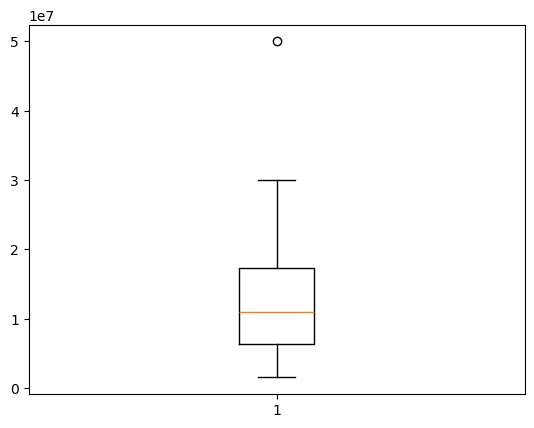

In [262]:
plt.boxplot(df[['Price']])
plt.show()

In [263]:
def remove_outlier(df ,column):
    q3 = df[column].quantile(0.75)
    q1 = df[column].quantile(0.25)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    df = df[(df[column] > lower) & (df[column] < upper)]
    return df
     
df = remove_outlier(df , 'Area')
df = remove_outlier(df , 'Bathrooms')
df = remove_outlier(df , 'HouseAge')
df = remove_outlier(df , 'Price')
df.head()
df.shape


(20, 6)

In [264]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)
df = pd.DataFrame(scaled , columns=df.columns)
df.head()
# df.shape

,Area,Bedrooms,Bathrooms,LocationScore,HouseAge,Price
0,-1.594159,-1.135815,-1.605910,-1.606967,1.439710,-1.140430
1,0.046133,-1.135815,-0.688247,-1.194924,0.752497,-0.959170
2,-0.774013,-0.262111,0.229416,-0.782881,0.065285,-0.611754
3,-0.158903,-0.262111,0.229416,0.041204,-0.209600,-0.083078
4,0.456206,0.611593,0.229416,0.453247,-0.621927,-0.249233


In [265]:
X = df.drop('Price' ,  axis=1)
Y = df['Price']
# X
Y

0    -1.140430
1    -0.959170
2    -0.611754
3    -0.083078
4    -0.249233
5     0.823224
6     1.125325
7    -0.913855
8    -0.536229
9     0.067973
10    0.294548
11   -0.415388
12    0.596649
13    0.898750
14    1.427426
15    2.635828
16   -1.291480
17   -1.170640
18   -0.838329
19    0.339863
Name: Price, dtype: float64

16
16
4
4


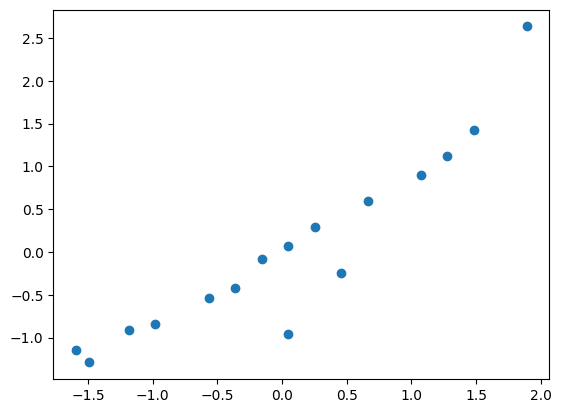

In [266]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , train_size=0.8 ,random_state=5)
print(len(X_train))
print(len(Y_train))
print(len(X_test))
print(len(Y_test))
plt.scatter(X_train['Area'],Y_train)


In [267]:
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

In [268]:
mse = mean_squared_error(Y_test,Y_pred)
mae = mean_absolute_error(Y_test,Y_pred)
rsme = root_mean_squared_error(Y_test,Y_pred)
r2 = r2_score(Y_test,Y_pred)
print(mse)
print(mae)
print(rsme)
print(r2)

0.23207170556573442
0.2924752885273929
0.48173821268997796
0.6198601388470144
